Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note entry: '
Warrning cannot parse note e

Text(0, 0.5, 'Amplitude')

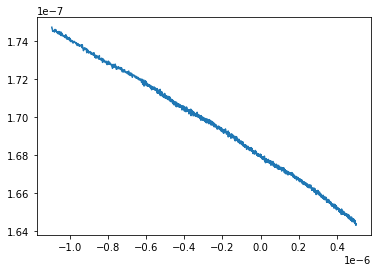

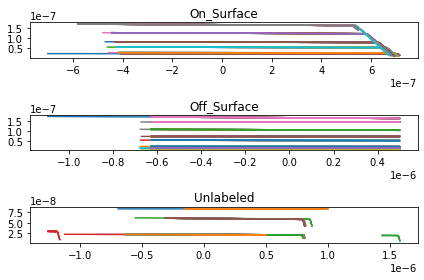

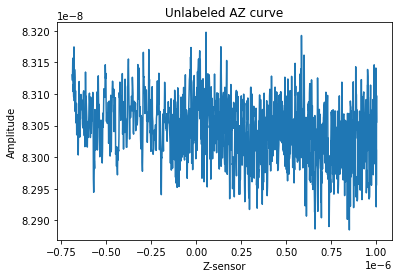

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import scipy.interpolate as interp
import igor.binarywave as ibw           # https://pypi.org/project/igor/
import glob 



#%%  Get list of Amp and phase vs Z filenames


filelist_onsurface = glob.glob('Data\\On_Surface\\*.ibw')  
filelist_offsurface = glob.glob('Data\\Off_Surface\\*.ibw')
filelist_unlabeled = glob.glob('Data\\Unlabeled\\*.ibw')

filelist = [filelist_onsurface, filelist_offsurface, filelist_unlabeled]

#filelist = glob.glob('Data\*.ibw')  

#%% Organize files into python dictonary 

data = {}                                           # Master dictionary 

for filetype in filelist:         
    for file in filetype: 
        indata = ibw.load(file)                     # Loads data from ibw file into indata 
        
        
        key1 = file.split('\\')[1]                  # key1 is On or Off surface state 
        key2 = file.split('\\')[2][0:-4]            # key2 is specific file name 
        
        try:                                        # Creates dictionary key if it does not exist 
            data[key1] 
        except: 
            data[key1] = {}            
        
        try: 
            data[key1][key2] 
        except: 
            data[key1][key2] = {}
            
                            
        
        for key in enumerate(indata['wave']['labels'][1][1:]):     
            data[key1][key2][str(key[1])[2:-1]] = indata['wave']['wData'][:,key[0]]         # Places amplitude, phase, and Z in data
            
        notedic = {}                                                                                
        for item in str(indata['wave']['note']).split('\\r'):
            try: 
                notedic[item.split(':')[0]] = item.split(':')[1]
            except: 
                print("Warrning cannot parse note entry: " + item)
        
        data[key1][key2]['note'] = notedic                                                  # Place file meta data in data 


#%% Visulize the Amp and phase vs Z data
   
plt.figure()            # Plots single curve 
plt.plot(data['Off_Surface']['AZ_0101']['ZSnsr'],data['Off_Surface']['AZ_0101']['Amp'])    

count = 1 
plt.figure()            # Plots all curves 
for key1 in data.keys(): 
    plt.subplot(3,1,count)
    plt.title(key1)
    for key2 in data[key1].keys():
        plt.plot(data[key1][key2]['ZSnsr'],data[key1][key2]['Amp']) 
    count = count + 1

plt.tight_layout()


#%% Training logistical regression model  

model = LogisticRegression(solver='liblinear', random_state=0)

x_train = []
y_train = []

Zpts = 50 
for key1 in list(data.keys())[0:2]: 
    for key2 in data[key1].keys(): 
        interp_func = interp.interp1d(data[key1][key2]['ZSnsr'] ,data[key1][key2]['Amp']*1e9 )              # Creates interpolation function
        Zmin = np.min(data[key1][key2]['ZSnsr'])                        
        Zmax = np.max(data[key1][key2]['ZSnsr'])
        Zintp = np.linspace(Zmin,Zmax,Zpts)                                                                 # Creates interpolation points
        Ampintp = interp_func(Zintp)                                                                        # Does interpolation 
        if True in np.isnan(Ampintp): 
            print('Warning: Nan on interp:' + key1 + ', ' + key2)        
        else: 
            x_train.append(Ampintp)                                                                         # Builds xtrain 
            if key1 == 'On_Surface':                                                                        # Builds ytrain 
                y_train.append(1)
            else: 
                y_train.append(0)

   
output = model.fit(x_train, y_train)            
                                                  # Does training 

#%% Testing logistical regression model 

test_index = 55                                                                                             # Test index 
pred_data = model.predict([x_train[test_index]])                                                            # Does test 
print('Prediction: ', pred_data[0], ', Truth: ', y_train[test_index])

key1 = 'Unlabeled'
for key2 in data[key1].keys():
    interp_func = interp.interp1d(data[key1][key2]['ZSnsr'] ,data[key1][key2]['Amp']*1e9 )              # Creates interpolation function
    Zmin = np.min(data[key1][key2]['ZSnsr'])                        
    Zmax = np.max(data[key1][key2]['ZSnsr'])
    Zintp = np.linspace(Zmin,Zmax,Zpts)                                                                 # Creates interpolation points
    Ampintp = interp_func(Zintp) 
    
    pred_data = model.predict([Ampintp])                                                            # Does test 
    print(key2, '  Prediction : ', pred_data[0], ', Truth: ')
    
    # accuracy = model.score([Ampintp])
    # Print(accuracy)
    
#%%  Visualization

plt.figure()            # Plots single curve 
plt.plot(data['Unlabeled']['AZ_0000']['ZSnsr'],data['Unlabeled']['AZ_0000']['Amp'])
plt.title('Unlabeled AZ curve')
plt.xlabel('Z-sensor')
plt.ylabel('Amplitude')
#plt.ylim([8e-8, 9e-8])


In [16]:
y_train


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [9]:
data.keys()


dict_keys(['Data'])